# Grade: /100 Mark(s)

# Assignment 02: Maximum Likelihood


### Maximum Likelihood

The poisson distribution https://en.wikipedia.org/wiki/Poisson_distribution is a discrete probability distribution often used to describe count-based data, like how many snowflakes fall in a day.

If we have count data $y$ that are influenced by a covariate or feature $x$, we can used the maximum likelihood principle to develop a regression model that estimates the mean of $Y$ given $X = x$.

### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


In [100]:
#Packages for this assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize as so
from scipy.special import gammaln
from sklearn import linear_model
from IPython.display import display

### Question 1: /10 Marks

The negative log likelihood for a Poisson random variable is

$$\ell(\lambda; \mathbf{y}) = -\sum_{i=1}^N\Bigg(   y_{i}\cdot \ln(\lambda) - \lambda - \ln(y_i!) \Bigg)$$

Here, $\mathbf{y}$ is a vector of counts and $\lambda$ is a scalar value.

Write a function called `poissonNegLogLikelihood` that takes a vector of counts $\mathbf{y}$ and a parameter $\lambda$ and returns the negative log likelihood.  The $\sum_{i} \ln(y!)$ does not affect the location of the maximum, and so you can omit the $ \ln(y!)$ in your function.

Test your function by calling it with `lam = 1.3` and `y=np.array([2,1,0,0])`.

What happens when you call the function when `lam=np.array([1,0.5,1,3])` and  `y=np.array([2,1,0,0])`? 

Answer the following below in markdown: What happens when you set an element of lam to 0 or a negative number and why? 


#### Answer to Question 1

Your answer here.

In [101]:
# We define the poisson negative log likelihood function as follows
def poissonNegLogLikelihood(lam,y):
    # Read up on the gamma function to make sure you get the likelihood right!
    neg_log_lik = -1 * sum(y*np.log(lam)-lam)
    return neg_log_lik

# We test the poisson negative log likelihood function as follows
lam = 1.3
y = np.array([2,1,0,0])
poissonNegLogLikelihood(lam,y)

# We obtain the value 4.412907206597527

lam=np.array([1,0.5,1,3])
y = np.array([2,1,0,0])
poissonNegLogLikelihood(lam,y)

# We obtain the value 6.193147180559945, this occurs as we take a array of lam vals
# and perform the subsequent sum using both arrays

# When you set an element of lam to 0 you get a divide by zero error
# Since you division by zero is not defined for the function
# When you set an element of lam to negative you get an invalid error because you 
# cant take the ln of a negative number


6.193147180559945

---

### Question 2: /15 Marks

Write a function called `poissonRegressionNegLogLikelihood` that takes as arguments a vector $\mathbf{y}$ of counts, a design matrix $\mathbf{X}$ of features for each count, and a vector $\mathbf{\beta}$ of parameters. The function should return the negative log likelihood of this dataset, assuming that each element of  $\mathbf{y}$ is independent and Poisson distributed with parameter $\lambda = \exp(\mathbf{X}\beta)$.

Hint: You can use `poissonNegLogLikelihood` in this answer!
Test your function by calling it with 
* `b=np.array([1,2])`
* `X=np.array([[1,2,3],[2,3,1]]).T`
* `y=np.array([0,2,10])`


In [102]:
# We define the poisson regression log likelihood as follows
def poissonRegressionNegLogLikelihood(b, X, y):
    #Enter the expression for lambda as shown above!
    lam = np.exp(np.dot(X,b))
    # Use poissonNegLogLikelihood to compute the likelihood
    neg_log_lik = poissonNegLogLikelihood(lam,y)
    return neg_log_lik

# We test the function as follows
b=np.array([1,2])
X=np.array([[1,2,3],[2,3,1]]).T
y=np.array([0,2,10])
poissonRegressionNegLogLikelihood(b, X, y)
# The value is 3211.7843052468816

3211.7843052468816

### Question 3: /10 Marks

a) In `poissonRegressionNegLogLikelihood`, why did we apply the exponential function to $\mathbf{X}\beta$?  Hint: Can an exponential ever be negative?

b) What might have happened had we just passed $\lambda = \mathbf{X}\beta$?

Answer parts a) and b) below in this cell.  Write no more than 2 sentences per answer! 

---

a) The function exp maps to positive reals, so we know that the value of lambda will always be positive.
Thus our function will always work.

b) As we saw in question 1 if we dont transform the lambda value we could pass a negative or zero value.
Thus we would obtain a division by zero error or an invalid error


### Question 4: /5 Marks

Write a function called `modelPrediction` which accepts as its first argument a vector of coefficents $\beta$ and a design matrix $\mathbf{X}$.  The function should return predictions of the form $\widehat{\mathbf{y}} = \exp(\mathbf{X}\beta)$. 

Hint: Numpy implements the exponential using `np.exp`.  

Test your function by calling it with 
* `b=np.array([1,2])`
* `X=np.array([[1,2,3],[2,3,1]]).T`

In [103]:
# We define the model prediction function as follows
def modelPrediction(b,X):
    yhat = np.exp(np.dot(X,b))
    return yhat
# We test the function as follows
b=np.array([1,2])
X=np.array([[1,2,3],[2,3,1]]).T
modelPrediction(b,X)



array([ 148.4131591 , 2980.95798704,  148.4131591 ])

### Question 5: /15 Marks

Write a function called `fitModel` which accepts as its first argument argument a design matrix $\mathbf{X}$ and as its second argument a vector of outcomes counts $\mathbf{y}$. The function should return the maximum likelihood estimates for the coefficients of a Poisson regression of $\mathbf{y}$ onto $\mathbf{X}$.

Test your function by calling it with 
* `X=np.array([[1,2,3],[2,3,1]]).T`
* `y=np.array([0,2,10])`

What is your estimated b? 

In [104]:
import scipy.optimize as so
# We define the fit model function as follows
def fitModel(X,y):
    # Instantiate a guess for the betas, beta_start, so that the optimizer has somewhere to start
    # Keep in mind what shape the beta_start should be. It shoud have the same number of elements as X as columns
    nrows,ncols = X.shape
    beta_start = np.zeros((ncols,1))
    # Minimize the appropriate likelihood function
    mle = so.minimize(poissonRegressionNegLogLikelihood, beta_start, args=(X, y), method="Powell", tol = 1e-8)
    # Extract the maximum likelihood estimates from the optimizer.
    betas = mle.x
    return betas

# Write code to show your estimated b.
X=np.array([[1,2,3],[2,3,1]]).T
y=np.array([0,2,10])
fitModel(X,y)
# We obtain the estimated betas

array([ 0.94827555, -0.52953518])

### Question 6: /20 Mark(s)

Load in the data from `poisson_regression_data.csv`. Plot a scatterplot of the data. Fit a poisson regression to this data using the functions you wrote above.  Plot the model predictions over $x \in [-2,2]$ on the same graph as the scatterplot of the data.  

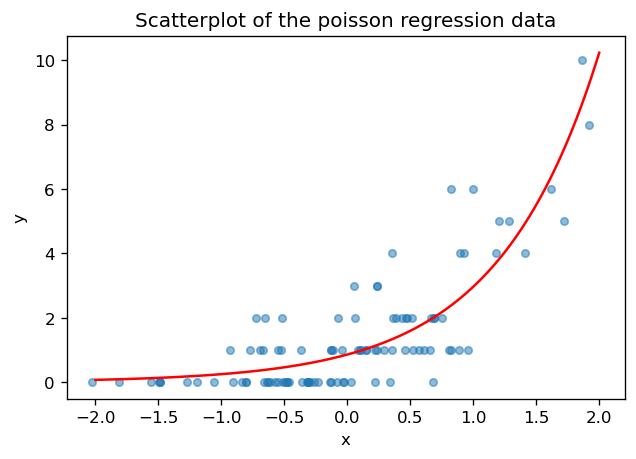

In [105]:
# Loading in the data.  
df = pd.read_csv('poisson_regression_data.csv')

fig, ax = plt.subplots(dpi = 120)
df.plot.scatter(x = 'x', y = 'y', alpha = 0.5, ax = ax)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatterplot of the poisson regression data')
# Scatterplot the data. 

# Fit the model.  Use your functions.  
x = df.x.values 
n = len(df.index)
X = np.c_[np.ones(n),x]
y= df.y.values

# Find the maximum likelihood estimates for the coefficients for this data
betas = fitModel(X,y)

# Make predictions on new data
newx = np.linspace(-2,2,1001)
newX = np.c_[np.ones(1001),newx]

# Make predictions on the new data
y_predicted= modelPrediction(betas,newX)

#Finally, plot the predictions on the same axis and color the predictions red
plt.plot(newx, y_predicted, c='red')




### Question 7:  /20 Marks

Now apply linear regression (ordinary least squares) to the data, obtain parameter estimates and and plot the predictions over the same range.


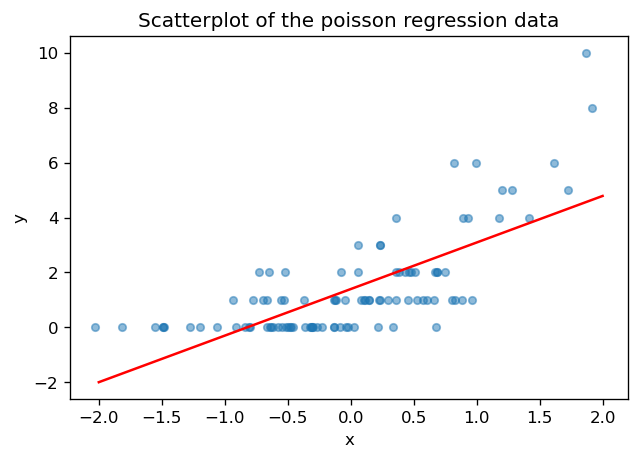

In [106]:
# Hint: Very similar to the previous assignment
# Read in the data
df = pd.read_csv('poisson_regression_data.csv')

# Fit the model.  Use your functions.  
x = df.x.values 
n = len(df.index)
X = np.c_[np.ones(n),x]
y= df.y.values

# fit the model
ols_fit = linear_model.LinearRegression()
ols_fit.fit(X, y)
betas = ols_fit.coef_
betas 

# The model has coefficients b0=0 and b1=1.69532321
# Plot a scatter plot of the data and your model's predictions
fig, ax = plt.subplots(dpi = 120)
df.plot.scatter(x = 'x', y = 'y', alpha = 0.5, ax = ax)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatterplot of the poisson regression data')
# Scatterplot the data. 

# Make predictions on new data
newx = np.linspace(-2,2,1001)
newX = np.c_[np.ones(1001),newx]

# Make predictions on the new data
y_predicted = ols_fit.predict(newX)

#Finally, plot the predictions on the same axis and color the predictions red
plt.plot(newx, y_predicted, c='red')




### Question 8: /5 Mark(s)

Do you see any major problems with the predictions from linear regression? Keep in mind that this model is intended to model counts of things.  Provide your answer below in markdown in fewer than 5 sentences. 

#### Answer

A major problem from the linear regression model is that it fits data in a straight line however the data curves upward.
The poisson model cannot be modelled efficiently using linear regression.
Notice that there are many points above and below the fitted line.
This will cause a very low R2 value compared to the model from question 6.

### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.